**Predicting Wine Quality** 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier  
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score 
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import plot_confusion_matrix
from sklearn.preprocessing import LabelEncoder


Importing data and do some exploration

In [2]:
df = pd.read_csv('winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


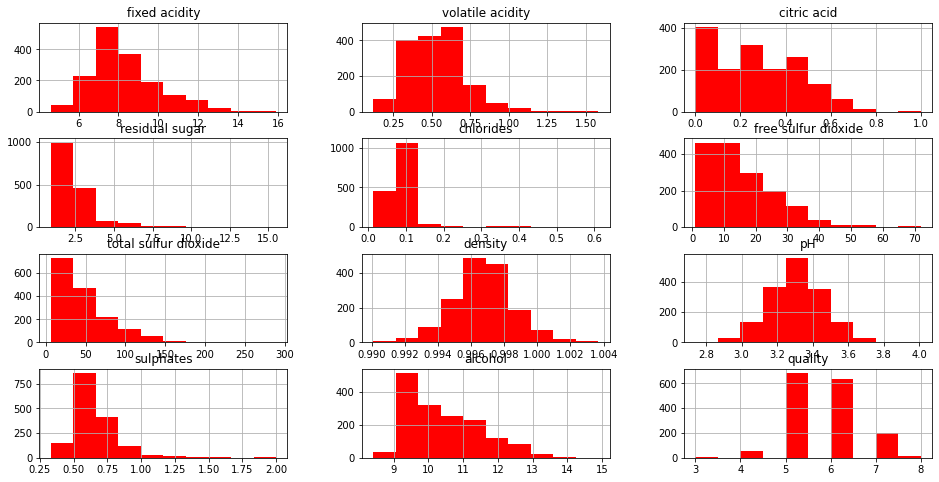

In [3]:
df.hist(figsize=(16,8),color = 'red');

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


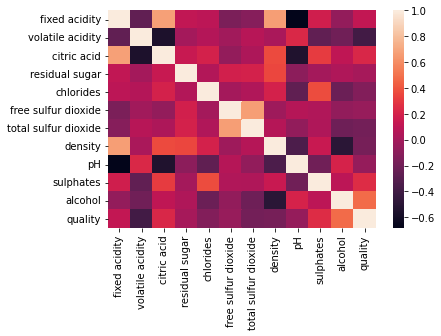

In [5]:
import seaborn as sns
sns.heatmap(df.corr())


**Data Preprocessing**

*   Considering wine with quality less than or equal 6 is bad , more than 6 is good

*   Standerdize the feature 




In [6]:
df['quality'] = np.where(df['quality'] > 6, 1, 0)
df['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

In [7]:
X = df.iloc[:, 0:-1].values
y = df.iloc[:, -1].values


In [8]:
print(X.shape,y.shape)

(1599, 11) (1599,)


In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.35, random_state=1)

In [24]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)


Building a Logestic Regression model with gridSearchCV to tune the parameters

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space}
classifier = LogisticRegression(random_state = 1) 

In [26]:
logreg_cv = GridSearchCV(classifier, param_grid, cv=5)


In [27]:
logreg_cv.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=1, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([1.00000000e-05, 8.48342898e-05, 7.19685673e-04, 6.10540230e-03,
       5.17947468e-02, 4.39397056e-01, 3.72759372e+00, 3.16227766e+01,
       2.68269580e+02, 2.27584593e+03, 1.93069773e+04, 1.63789371e+05,
       1.38949549e+06, 1.17876863e+07, 1.00000000e+08])},
             pre_dispatch='2*n_jobs', refit=True, retu

In [28]:
y_pred = logreg_cv.predict(X_test)

Get the Best parameters and build a confusion metrix

In [29]:
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_)) 
print("Best score is {}".format(logreg_cv.best_score_))

Tuned Logistic Regression Parameters: {'C': 3.727593720314938}
Best score is 0.8873931623931626


In [16]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[462  23]
 [ 54  21]]
              precision    recall  f1-score   support

           0       0.90      0.95      0.92       485
           1       0.48      0.28      0.35        75

    accuracy                           0.86       560
   macro avg       0.69      0.62      0.64       560
weighted avg       0.84      0.86      0.85       560



Build a Decesion Tree Model

In [17]:
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier


In [18]:
tree = DecisionTreeClassifier()
tree.fit(X,y)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [19]:
ypred_tree = tree.predict(X_test)
print(confusion_matrix(y_test, ypred_tree))
print(classification_report(y_test, ypred_tree))

[[314 171]
 [ 52  23]]
              precision    recall  f1-score   support

           0       0.86      0.65      0.74       485
           1       0.12      0.31      0.17        75

    accuracy                           0.60       560
   macro avg       0.49      0.48      0.45       560
weighted avg       0.76      0.60      0.66       560



In [20]:
from sklearn.neighbors import KNeighborsClassifier


In [21]:
KNN = KNeighborsClassifier(algorithm='auto')
parameters_KNN = {
    'n_neighbors': (1,10, 1)}
grid_KNN = GridSearchCV(
    estimator=KNN,
    param_grid=parameters_KNN,
    scoring = 'accuracy',
    cv = 5
)
grid_KNN.fit(X_train, y_train)
y_pred_KNN =grid_KNN.predict(X_test)

In [22]:
print("Tuned KNN Parameters: {}".format(grid_KNN.best_params_)) 
print("Best score is {}".format(grid_KNN.best_score_))

Tuned KNN Parameters: {'n_neighbors': 1}
Best score is 0.8816332218506131


In [23]:

print(confusion_matrix(y_test, y_pred_KNN))
print(classification_report(y_test, y_pred_KNN))

[[444  41]
 [ 28  47]]
              precision    recall  f1-score   support

           0       0.94      0.92      0.93       485
           1       0.53      0.63      0.58        75

    accuracy                           0.88       560
   macro avg       0.74      0.77      0.75       560
weighted avg       0.89      0.88      0.88       560



Logestic Regression model performs better than DecisionTree